<img src="http://www.cidaen.es/assets/img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">




<br><br><br>
<h2><font color="#00586D" size=4>Module 8</font></h2>



<h1><font color="#00586D" size=5>Book recommendation system</font></h1>

<br><br><br>
<div style="text-align: right">
<font color="#00586D" size=3>Luis de la Ossa</font><br>
<font color="#00586D" size=3>Master in Data Science and Data Engineering in the Cloud</font><br>
<font color="#00586D" size=3>University of Castilla-La Mancha</font>

</div>

---

<a id="indice"></a>
<h2><font color="#00586D" size=5>Index</font></h2>


*[1. Introduction](#section1)* [Reading reviews](#section11)
   *[Tags](#section12)* [Data preparation](#section13)
*[2. Text cleanup](#section2)* [3. tf-idf representation similarity search](#section3)
*[4. Content-based recommendation](#section4)* [User's favorite book selection](#section41)
   *[Search for similar books](#section42)* [Result prioritization and recommendation](#section43)
*[5. Hybrid recommendation system](#section5)* [6. LDA and similarity search](#section6)
<br>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings

warnings.filterwarnings('ignore')

<a id="section1"></a>
## <font color="#00586D"> 1. Introduction</font>
<br>

Recommendation systems based on collaborative filtering exclusively use the voting profiles of users/items, and do not consider the content. As we saw in class, they allow us to obtain results that, although qualitatively acceptable, can be disconcerting as they do not correspond to what was expected.

In this project a small content-based book recommendation system will be designed. To do this, it will be necessary to make use of some of the concepts related to machine learning on textual information (_Text Mining_) that have also been discussed throughout the module.

As a starting point, we will start with the data set [goodbooks-10k](https://www.kaggle.com/zygmunt/goodbooks-10k) available on [kaggle](https://www.kaggle.com). This contains information related to 10,000 books obtained from the social network [goodreads](http://goodreads.com), which is currently the reference site on the Internet for reading fans. In addition to titles and authors, the data set includes votes and tags contributed by more than 53,000 users.

<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Some modifications have been made with respect to the original base to make it less tedious to manage the different indexes and identifiers.
</div>

In [2]:
import pandas as pd
import numpy as np

df_goodreads = pd.read_csv('data/books.csv', sep="\t", index_col=0)
df_goodreads.head(2)

,gr_book_id,gr_best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
book_id,,,,,,,,,,,,,,,,,,,,,
0,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...


<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section11"></a>
### <font color="#00586D"> Reading </font> reviews
<br>

The data in the table barely contains information regarding the content of each book. However, it is possible to access the summaries stored on the [GoodReads] website itself (www.goodreads.com) which, to a certain extent, provide this information. The function used to obtain them is attached in [annex](#Annex).

The summary of each book has been stored in a text file called `./data/overviews/bookid.txt`, where _bookid_ corresponds to the book identifier (column `book_id` of ` df_goodreads`).

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Implement a function, called `get_overview(gr_book<_>id)`, that receives the identifier of a book, reads the text file containing the corresponding summary, and returns it in a <_>String_ (or return `None` if this summary does not exist).

In [3]:
def get_overview(book_id):
    try:
        #
        with open(f"./data/overviews/{book_id}.txt") as f:
            file_content = f.read().rstrip("\n")
        return file_content
        #
    except:
        return None
    
get_overview(320) # Cien años de soledad (Gabriel García Márquez)

'(Book Jacket Status: Jacketed)The brilliant, bestselling, landmark novel that tells the story of the Buendia family, and chronicles the irreconcilable conflict between the desire for solitude and the need for loveâ€”in rich, imaginative prose that has come to define an entire genre known as "magical realism."'

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true"></i></font> Create a column in `df_goodreads`, called `overview`, containing the review of the corresponding book. Fill the empty values ​​in that column with a zero-length_String_ ("").

In [4]:
df_goodreads['overview'] = df_goodreads.apply(lambda x: get_overview(x.gr_book_id) if get_overview(x.gr_book_id) is not None else "", axis =1)

In [5]:
df_goodreads.head(5)

,gr_book_id,gr_best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,overview
book_id,,,,,,,,,,,,,,,,,,,,,
0,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Winning will make you famous. Losing means cer...
1,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,Harry Potter's life is miserable. His parents ...
2,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,About three things I was absolutely positive.F...
3,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,...,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,The unforgettable novel of a childhood in a sl...
4,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,...,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,"On its first publication in 1925, The Great Ga..."


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section12"></a>
### <font color="#00586D"></font> tags
<br>


Labels related to each book that have been contributed by users are provided in the data set. This information is included in two files. The first of them, `tags.csv`, contains the identifier of each tag and the corresponding code. The second, `book_tags.csv` contains the tags related to each book. They will be stored, respectively, in the_DataFrame_`df_tags` and `df_book_tags`.

In [6]:
df_tags = pd.read_csv('./data/tags.csv')
df_book_tags = pd.read_csv('./data/book_tags.csv')

Etiquetas

In [7]:
df_tags.iloc[2000:2002]

,tag_id,tag_name
2000,2000,alex-read
2001,2001,alex-rider


Etiquetas por libro

In [8]:
df_book_tags.head(3)

,gr_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173


<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Add the `tag_name` field of `df_tags` to `df_book_tags`, replacing the `tag_id` field with the tag (_ String_) corresponding. To do this, merge the two_DataFrame_and then remove the `count` and `tag_id` columns.

In [9]:
df_book_tags = df_book_tags.merge(df_tags, on='tag_id', how='inner')[['gr_book_id', 'tag_name']]
df_book_tags.tail()

,gr_book_id,tag_name
999907,31538635,hogwarts
999908,32848471,jan-2017
999909,33288638,single-mom
999910,33288638,fave-author
999911,33288638,slowburn


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Inspect the tags that appear in `df_book_tags` and the number of times each appears. Should some be removed?

In [10]:
from collections import Counter
Counter(df_book_tags["tag_name"])

Counter({'to-read': 9983,
         'fantasy': 4259,
         'favorites': 9881,
         'currently-reading': 9776,
         'young-adult': 3630,
         'fiction': 9097,
         'harry-potter': 32,
         'books-i-own': 9799,
         'owned': 9858,
         'ya': 2842,
         'series': 5080,
         'favourites': 6422,
         'magic': 1898,
         'childrens': 1354,
         'owned-books': 9221,
         're-read': 3903,
         'adventure': 3661,
         'children': 1383,
         'j-k-rowling': 29,
         'children-s': 1267,
         'sci-fi-fantasy': 2467,
         'childhood': 1418,
         'all-time-favorites': 2800,
         'default': 8239,
         'my-books': 7561,
         'classics': 2785,
         'reread': 1357,
         'i-own': 6670,
         'audiobook': 7242,
         '5-stars': 2599,
         'children-s-books': 1187,
         'favorite-books': 2683,
         'kids': 1267,
         'novels': 5665,
         'fantasy-sci-fi': 1991,
         'favorite':

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

One of the things that is observed is that there are a high number of tags that appear once, and that are irrelevant, so it is better to ignore them.

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Remove all tags that appear less than 20 times.


In [11]:
df_book_tags = df_book_tags.groupby("tag_name").filter(lambda x: len(x)>=20)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Another problem that can be seen is that some labels are generic, and do not correspond to specific books. For example words like `read-readings` or `favourites`.

In [12]:
df_book_tags['tag_name'].value_counts().nlargest(25)

to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
default              8239
ebook                8054
my-books             7561
audiobook            7242
ebooks               7203
wish-list            7192
my-library           7000
audiobooks           6862
i-own                6670
adult                6604
audio                6548
favourites           6422
novels               5665
own-it               5514
contemporary         5287
Name: tag_name, dtype: int64

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Remove all tags containing these terms (the terms in the `target_tags` list).



In [13]:
target_tags = ['read', 'favo', 'own', 'top', 'book', 'librar', 'kindle', 'list']

df_book_tags = df_book_tags[~df_book_tags['tag_name'].str.contains('|'.join(target_tags), case=False, regex=True)]

df_book_tags

,gr_book_id,tag_name
9983,1,fantasy
9984,2,fantasy
9985,3,fantasy
9986,5,fantasy
9987,6,fantasy
...,...,...
997632,29430013,best-of-2016
997633,29519514,best-of-2016
997634,30008702,best-of-2016
997635,30364931,best-of-2016


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Finally, a `DataFrame` named `df_book_tag_text` will be created in which, for each book (indicated by its code `goodreads_book_id`), A column will be added with_a single text field_, the result of joining the corresponding labels.

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Group the `DataFrame` entries into `df_book_tags` based on the `goodreads_book_id` field and join all the tags in each group using `join`. Store the result in a `DataFrame` named `df_book_tag_text`.


In [14]:
df_book_tag_text = df_book_tags.groupby("gr_book_id")["tag_name"].apply(lambda tags: ','.join(tags)).to_frame()

df_book_tag_text.head()

,tag_name
gr_book_id,
1,"fantasy,young-adult,fiction,harry-potter,ya,se..."
2,"fantasy,young-adult,fiction,harry-potter,ya,ma..."
3,"fantasy,young-adult,fiction,harry-potter,ya,se..."
5,"fantasy,young-adult,fiction,harry-potter,ya,se..."
6,"fantasy,young-adult,fiction,harry-potter,ya,se..."


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Rename the `tag_name` column from `df_book_tags` to `text_tags`. Fill missing values ​​with an empty String ("").

In [15]:
df_book_tag_text = df_book_tag_text.rename(columns={'tag_name':'text_tags'}).fillna('')

df_book_tag_text.head()

,text_tags
gr_book_id,
1,"fantasy,young-adult,fiction,harry-potter,ya,se..."
2,"fantasy,young-adult,fiction,harry-potter,ya,ma..."
3,"fantasy,young-adult,fiction,harry-potter,ya,se..."
5,"fantasy,young-adult,fiction,harry-potter,ya,se..."
6,"fantasy,young-adult,fiction,harry-potter,ya,se..."


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Merge the tags text information, i.e. the `text_tags` column, into the main `df_goodreads` `DataFrame` (use _merge_).

In [16]:
df_goodreads =  df_goodreads.merge(df_book_tag_text, how = "left", on = 'gr_book_id')

df_goodreads.head(2)

,gr_book_id,gr_best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,overview,text_tags
0,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",...,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Winning will make you famous. Losing means cer...,"fantasy,young-adult,fiction,ya,series,adventur..."
1,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,Harry Potter's life is miserable. His parents ...,"fantasy,young-adult,fiction,harry-potter,ya,se..."


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<a id="section2"></a>
## <font color="#00586D"> 2. Cleaning and preparing the </font> text
<br>

In this project, the content (text) associated with each book is represented using a bag-of-words model. As explained throughout the module, when working with this type of representation it is advisable to clean the text and eliminate irrelevant information. For this the `spacey` library will be used. First, the `en_core_web_sm` language model will be used. Although it is not the best performing model, it is sufficient for this context, and is more efficient than `en_core_web_trf` (based on *transformers*, and which is the which works best).

In [17]:
! python -m spacy download es_dep_news_trf
! python -m spacy download en_core_web_sm # Solo se utilizará este
! python -m spacy download en_core_web_trf 

                                              0.0/410.2 MB ? eta -:--:--
                                            0.0/410.2 MB 991.0 kB/s eta 0:06:54
                                              0.2/410.2 MB 2.4 MB/s eta 0:02:50
                                              0.6/410.2 MB 3.9 MB/s eta 0:01:44
                                              1.6/410.2 MB 8.4 MB/s eta 0:00:49
                                             3.9/410.2 MB 16.5 MB/s eta 0:00:25
                                             6.7/410.2 MB 23.9 MB/s eta 0:00:17
                                             9.8/410.2 MB 29.8 MB/s eta 0:00:14
     -                                      12.7/410.2 MB 59.5 MB/s eta 0:00:07
     -                                      15.7/410.2 MB 65.2 MB/s eta 0:00:07
     -                                      18.2/410.2 MB 59.8 MB/s eta 0:00:07
     -                                      18.2/410.2 MB 59.8 MB/s eta 0:00:07
     -                                      18.

2023-09-04 19:48:23.198131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-09-04 19:48:23.198174: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-04 19:48:26.971958: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-09-04 19:48:26.972780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2023-09-04 19:48:26.973560: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2023-09-04 19:48:26.974332: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

                                              0.0/460.3 MB ? eta -:--:--
                                              0.1/460.3 MB 2.4 MB/s eta 0:03:13
                                              0.4/460.3 MB 3.7 MB/s eta 0:02:05
                                              0.9/460.3 MB 6.0 MB/s eta 0:01:17
                                             2.2/460.3 MB 11.6 MB/s eta 0:00:40
                                             4.6/460.3 MB 19.8 MB/s eta 0:00:23
                                             7.4/460.3 MB 26.3 MB/s eta 0:00:18
                                            11.4/460.3 MB 54.4 MB/s eta 0:00:09
     -                                      14.1/460.3 MB 59.5 MB/s eta 0:00:08
     -                                      16.7/460.3 MB 59.8 MB/s eta 0:00:08
     -                                      19.8/460.3 MB 65.6 MB/s eta 0:00:07
     -                                      22.6/460.3 MB 65.6 MB/s eta 0:00:07
     --                                     25.

2023-09-04 19:48:55.286614: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-09-04 19:48:55.286657: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-04 19:48:58.824274: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-09-04 19:48:58.825072: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2023-09-04 19:48:58.825906: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2023-09-04 19:48:58.826688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [18]:
import spacy 

# Crea un objeto con el pipeline
nlp = spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Create a function called `clean` that accepts a text, converts it into a document (`spacey`) and returns a *String* composed of the lemmas corresponding to each token, in lower case, and discarding the tokens that are not alphanumeric, or those that correspond to *stopwords*.

In [19]:
def clean(overview):
    doc = nlp(overview.casefold())
    lemmas = " ".join(token.lemma_ for token in doc if token.is_alpha and not token.is_stop and not token.is_punct and not token.is_digit and not token.is_space and not token.is_currency)
    return lemmas
    #
    
overview = df_goodreads.iloc[0]['overview']
clean(overview)

'win famous lose mean certain nation panem form post apocalyptic north america country consist wealthy capitol region surround poor district early history rebellion lead district capitol result destruction creation annual televise event know hunger game punishment reminder power grace capitol district yield boy girl age lottery system participate game tribute choose annual reaping force fight death leave survivor claim year old katniss young sister prim select district female representative katniss volunteer place male counterpart peeta pit big strong representative train life see death sentence katniss close death survival second nature'

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font>Apply the `clean` function on each text stored in the `df_goodreads['overview']` column to preprocess it, storing the result in the column itself.

In [20]:
df_goodreads['overview'] = df_goodreads['overview'].apply(lambda x: clean(str(x)))

In [21]:
df_goodreads['overview']

0       win famous lose mean certain nation panem form...
1       harry potter life miserable parent dead stuck ...
2       thing absolutely edward know dominant thirst u...
3       unforgettable novel childhood sleepy southern ...
4       publication great gatsby largely dismiss light...
                              ...                        
9995    edge lie world border break people shop walmar...
9996    robert caro life lyndon johnson begin greatly ...
9997    aubrey maturin volume actually constitute sing...
9998    acclaimed author groundbreake bestseller schoo...
9999    world war create modern world conflict unprece...
Name: overview, Length: 10000, dtype: object

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section13"></a>
### <font color="#00586D"> Data preparation </font>
<br>

Once the information related to summaries and labels is incorporated, and since the text will be treated simply as a bag of words, it will merge, constituting the content of each book.


<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i></font>
Merge the `overview` and `text_tags` columns of `df_goodreads` into another column called `text`. Remove columns where `text` has length 0.

In [22]:
df_goodreads["text"] = df_goodreads[["overview", "text_tags"]].apply(",".join, axis=1)


columns_to_drop = []
for col in df_goodreads.columns:
    if (df_goodreads["text"].str.len() == 0).any():
        columns_to_drop.append(col)
df_goodreads = df_goodreads.drop(columns=columns_to_drop)


df_goodreads.shape

(10000, 25)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

In [23]:
data_books = df_goodreads['text']

#### <font color="#00586D"> Selection of five books for testing </font>


Next, five books are chosen, which will be stored in the `DataFrame` `df_books_test`



In [24]:
test_pos = np.array([2,4,7,9,12]) # Sugerencia. Podéis cambiarlos. 

df_books_test = df_goodreads.iloc[test_pos].copy()
df_books_test

,gr_book_id,gr_best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,overview,text_tags,text
2,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",...,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,thing absolutely edward know dominant thirst u...,"fantasy,young-adult,fiction,ya,sci-fi-fantasy,...",thing absolutely edward know dominant thirst u...
4,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,...,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,publication great gatsby largely dismiss light...,"young-adult,fiction,default,classics,5-stars,n...",publication great gatsby largely dismiss light...
7,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,The Catcher in the Rye,...,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...,hero narrator catcher rye ancient child sixtee...,"young-adult,fiction,ya,default,classics,novels...",hero narrator catcher rye ancient child sixtee...
9,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,Pride and Prejudice,...,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...,truth universally acknowledge single man posse...,"young-adult,fiction,default,classics,5-stars,n...",truth universally acknowledge single man posse...
12,5470,5470,153313,995,451524934,9.780452e+12,"George Orwell, Erich Fromm, Celâl Üster",1949.0,Nineteen Eighty-Four,1984,...,41845,86425,324874,692021,908229,https://images.gr-assets.com/books/1348990566m...,https://images.gr-assets.com/books/1348990566s...,seminal text century nineteen eighty rare work...,"fantasy,young-adult,fiction,sci-fi-fantasy,def...",seminal text century nineteen eighty rare work...


<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>


---

<a id="section3"></a>
## <font color="#00586D"> 3. Similarity search for tf-idf representation </font>
<br>

The _tf-idf_ information is very useful for classifying and comparing documents. Each text is represented by a vector of _tf-idf_ values, and the document search is supported by a similarity measure, the _cosine similarity_, for this representation.

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i></font> Create a `sklearn` `TfidfVectorizer` object, named `tfidf_vect`, representing a maximum of 20000 terms. Get the_tf-idf_array of the data stored in `data_books` and store it in a variable named `data_books_tfidf`. Extract the terms considered in `tfidf_vect`, and store them in the `terms` variable.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Creamos el objeto con un maximo de 2000 terminos, no utilizamos tokenizer=clean pues esto ya ha sido aplicado anteriormente
tfidf_vect = TfidfVectorizer(max_features=20000)
#Obtenemos la matriz
data_books_tfidf  = tfidf_vect.fit_transform(data_books)
#extraemos los términos
terms = tfidf_vect.get_feature_names_out()
#

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> Search for the most similar book </font>

A book included in the `df_books_test` data set will be taken. For example, the first.

In [26]:
print(df_books_test.iloc[0])
text_query = df_books_test.iloc[0].text
text_query

gr_book_id                                                               41865
gr_best_book_id                                                          41865
work_id                                                                3212258
books_count                                                                226
isbn                                                                 316015849
isbn13                                                         9780316015840.0
authors                                                        Stephenie Meyer
original_publication_year                                               2005.0
original_title                                                        Twilight
title                                                  Twilight (Twilight, #1)
language_code                                                            en-US
average_rating                                                            3.57
ratings_count                                       

'thing absolutely edward know dominant thirst unconditionally irrevocably love book twilight saga internationally bestselle author stephenie meyer introduce bella swan edward cullen pair star cross lover forbidden relationship ripen backdrop small town suspicion mysterious coven vampire love story bite,fantasy,young-adult,fiction,ya,sci-fi-fantasy,default,5-stars,novels,fantasy-sci-fi,paranormal,ya-fantasy,teen,english,urban-fantasy,supernatural,ya-fiction,young-adult-fiction,scifi-fantasy,faves,contemporary,on-my-shelf,have,movie,finished,sci-fi,ya-lit,werewolves,séries,love,science-fiction,finished-series,youngadult,abandoned,did-not-finish,dnf,american,movies,drama,high-school,romantic,horror,chick-lit,first-in-series,teen-fiction,meh,young-adults,guilty-pleasures,guilty-pleasure,paranormal-romance,ya-paranormal,ya-romance,vampires,vampire,completed-series,never-again,vamps,paranormal-fantasy,fantasy-paranormal,pnr,love-triangle'

In order to search for another book by similarity, it is necessary to transform the query text to the _tf-idf_ representation. Previously, it must be preprocessed (cleaned with the `clean` function).

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Transform the document `text_query` to_tf-idf_format and store the result in `text_query_tfidf`.



In [27]:
#Como ya hemos entrenado el modelo, solo necesitamos hacer un transform. Escribimos la variable en una lista porque .transform() espera iterables no strings
text_query_tfidf = tfidf_vect.transform([text_query])

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Show the 10 most relevant terms (with highest _tf-idf_ value) for the `text_query` document.

In [28]:
#
term_scores = np.asarray(text_query_tfidf.sum(axis=0)).ravel()
top_term_indices = term_scores.argsort()[-10:][::-1]
top_terms = np.array(tfidf_vect.get_feature_names_out())[top_term_indices]
#

In [29]:
top_terms

array(['fantasy', 'ya', 'paranormal', 'edward', 'unconditionally',
       'ripen', 'love', 'stephenie', 'vampire', 'cullen'], dtype=object)

In [30]:
feature_array = np.array(tfidf_vect.get_feature_names_out())
tfidf_sorting = np.argsort(text_query_tfidf.toarray()).flatten()


top_n = feature_array[tfidf_sorting][-10:][::-1]

In [31]:
top_n

array(['fantasy', 'ya', 'paranormal', 'edward', 'unconditionally',
       'ripen', 'love', 'stephenie', 'vampire', 'cullen'], dtype=object)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Calculate the similarities (cosine similarity) of the document `text_query_tfidf` with the rest of the documents in the matrix `data_books_tfidf`, and store them in a vector called `similarities _tfidf`.



In [32]:
from sklearn.metrics.pairwise import  cosine_similarity

similarities_tfidf = cosine_similarity(text_query_tfidf, data_books_tfidf).flatten()

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Get the indexes of the 6 books most similar to `text_query` (obviously, the most similar will be the book itself).

In [33]:
top_similarities = np.argsort(similarities_tfidf)[-6:]

df_goodreads.iloc[top_similarities]['title'][::-1]

2                                 Twilight (Twilight, #1)
48                                New Moon (Twilight, #2)
4820    Jessica's Guide to Dating on the Dark Side (Je...
51                                 Eclipse (Twilight, #3)
1539                         Masquerade (Blue Bloods, #2)
1559                                Switched (Trylle, #1)
Name: title, dtype: object

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

It can be seen that, indeed, the books are very similar. In fact, they all correspond to the saga. This may be due to the use of very specific keywords such as _"Twilight"_.

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>


---

<a id="section4"></a>
## <font color="#00586D"> 4. Recommendation based on </font> content
<br>

There are many possibilities in implementing content-based recommender systems. In general, they all require:

*Determine which items the user prefers* Find similar items
* Prioritize those items


To illustrate the operation of this type of system, data relating to the activity of a user chosen at random will be taken, and a set of recommended books will be returned.


The file `'./data/ratings.csv` contains the ratings made by more than 53,000 users for 10,000 books. In total, it contains about a million entries in the format (`user_id`, `book_id`, `rating`). The size of the database makes it difficult to work with a matrix, even if it is dispersed, since the elaboration process (using `pivot`) is very slow.

In [34]:
df_ratings = pd.read_csv('./data/ratings.csv', sep=',')

display(df_ratings.head())
df_ratings.shape

,user_id,book_id,rating
0,313,0,5
1,438,0,3
2,587,0,5
3,1168,0,4
4,1184,0,4


(981756, 3)

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>


---

<a id="section41"></a>
### <font color="#00586D"> Selection of books preferred by the user </font>
<br>

The first step of the recommendation is to determine which books the user prefers. One possibility is to select those for which the user has given a score greater than three.

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Take a random user and return the entries corresponding to the books they voted for. Store them in the `DataFrame` `ratings_user`. Discard from `ratings_user` all books with a score less than four.

In [35]:
np.random.seed(0)
test_user = np.random.randint(max(df_ratings['user_id']))

ratings_user = df_ratings.loc[(df_ratings['user_id'] == test_user) & (df_ratings['rating']>3)]
ratings_user

,user_id,book_id,rating
53101,2732,531,5
209776,2732,2099,5
214080,2732,2142,5
242344,2732,2425,4
369792,2732,3702,4
401262,2732,4018,4
425738,2732,4264,5
476351,2732,4773,4
524632,2732,5262,5
543609,2732,5454,4


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>


---

<a id="section42"></a>
### <font color="#00586D"> Search for similar books </font>
<br>

Once you have the list of books, you need to find similar books.

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> </font>Extract the representation of the books related to the user and copy it into an array named `user_books_tfidf`.

In [36]:
user_books_tfidf = tfidf_vect.transform(df_goodreads[df_goodreads['gr_book_id'].isin(ratings_user['book_id'])]['text'])

user_books_tfidf.shape

(3, 20000)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> </font> Compute the cosine similarity matrix between `user_books_tfidf`, `data_books_tfidf`. Set the similarities of books read with the user (`books_user_id `) with themselves to -1 in order to discard them.

In [37]:
similarities_user = cosine_similarity(user_books_tfidf, data_books_tfidf)
print(similarities_user)
books_user_id = df_goodreads.index[df_goodreads['gr_book_id'].isin(ratings_user['book_id'])]
similarities_user[:,books_user_id]=-1

similarities_user.shape

[[0.08438357 0.1083465  0.15872163 ... 0.03133137 0.04031304 0.01341213]
 [0.04866626 0.03433272 0.0390784  ... 0.07676632 0.04506993 0.07626469]
 [0.06428571 0.07735566 0.07441111 ... 0.02843544 0.04836764 0.02051261]]


(3, 10000)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> </font> Get the 3 most similar books _to each one_ of those read by the user and store them in the `similar_books` array.



In [38]:
similar_books = pd.concat([ df_goodreads.iloc[similarbook.argpartition(-3)[-3:]]['title'] for similarbook in similarities_user])

print(similar_books, "("+str(len(similar_books))+" libros distintos.)")

2269    Forever in Blue: The Fourth Summer of the Sist...
119     The Sisterhood of the Traveling Pants (Sisterh...
2053    Girls in Pants: The Third Summer of the Sister...
8052                           The Lord God Made Them All
4210    Elizabeth the Queen: The Life of a Modern Monarch
993     All Creatures Great and Small (All Creatures G...
4326                                   The Last Sin Eater
4286                          Redemption (Redemption, #1)
5690                            Remember (Redemption, #2)
Name: title, dtype: object (9 libros distintos.)


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>


---

<a id="section43"></a>
### <font color="#00586D"> Result prioritization and recommendation</font>

At this point, the books most similar to those read and rated positively by the user have been obtained. One possibility when prioritizing the results would be to give more weight to those similar books that have appeared more times in the `similar_books` matrix.

It is also possible to use the information from the `DataFrame` `df_goodreads` to prioritize books. Specifically, the `average_rating` column contains the average rating of each book on the platform, and can be used to prioritize.

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> </font> Obtain the 10 books with the highest `average_rating` among those most similar to those rated positively by the user (`similar_books`). Store your indexes in an array named `rec_books_user_id`.

In [39]:
rec_books_user_id = df_goodreads[df_goodreads.index.isin(similar_books.index)]['average_rating'].sort_values(ascending=False).head(10).index

rec_books_user_id

Int64Index([5690, 8052, 4286, 993, 4326, 4210, 2053, 2269, 119], dtype='int64')

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Finally, the names of the user's preferred books, whose indexes are stored in `books_user_id`, and the recommendation, whose indexes are stored in `rec_books_, are printed. user_id`.

In [40]:
print("Libros preferidos por el usuario: ")
print("----------------------------------")
for book in df_goodreads.iloc[books_user_id][['title', 'authors']].itertuples():
    print(book.authors, "\n\t",book.title)
    
print("\n\nRecomendación: ")
print("----------------------------------")
for book in df_goodreads.iloc[rec_books_user_id][['title', 'authors']].itertuples():
    print(book.authors, "\n\t",book.title)   

Libros preferidos por el usuario: 
----------------------------------
Ann Brashares 
	 The Second Summer of the Sisterhood (Sisterhood, #2)
Nick Hornby 
	 Fever Pitch
Ted Dekker 
	 Blink


Recomendación: 
----------------------------------
Karen Kingsbury, Gary Smalley 
	 Remember (Redemption, #2)
James Herriot 
	 The Lord God Made Them All
Karen Kingsbury, Gary Smalley 
	 Redemption (Redemption, #1)
James Herriot 
	 All Creatures Great and Small (All Creatures Great and Small, #1-2)
Francine Rivers 
	 The Last Sin Eater
Sally Bedell Smith 
	 Elizabeth the Queen: The Life of a Modern Monarch
Ann Brashares 
	 Girls in Pants: The Third Summer of the Sisterhood (Sisterhood, #3)
Ann Brashares 
	 Forever in Blue: The Fourth Summer of the Sisterhood (Sisterhood, #4)
Ann Brashares 
	 The Sisterhood of the Traveling Pants (Sisterhood, #1)


Puede observarse que, efectivamente, los títulos recomendados guardan mucha relación con los títulos valorados positivamente por el usuario. 

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>


---

<a id="section5"></a>
## <font color="#00586D"> 5. Hybrid recommendation system </font>
<br>

<br> In the previous section, the average rating of each book was used to prioritize the nearest neighbors. There is another possibility, which consists of using the book ratings obtained through collaborative filtering. This constitutes a hybrid system, since the two approaches are mixed. On the one hand, books are selected based on content, and from them, the set for which a higher score is predicted by the user is shown.
<br>

There is not much material available regarding this type of models. Nor is it a reference bookstore, although it is gaining popularity [surprise](http://surpriselib.com/). First of all, this library will be used to obtain the scores through collaborative filtering. Specifically, the SVD algorithm (seen in class) will be used.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> The main author of the library describes in a series of articles [link](http://nicolas-hug.com/blog/) how the basic version of this algorithm works. Reading is highly recommended.
</div>

In the next cell, the votes are loaded into the `ratings_data` structure (used by `surprise`) and an SVD model is learned.

In [41]:
pip install surprise

Note: you may need to restart the kernel to use updated packages.


In [42]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection.split import train_test_split

reader = Reader()
ratings_data = Dataset.load_from_df(df_ratings, reader).build_full_trainset()
svd = SVD(n_factors=10)
svd.fit(ratings_data);

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> </font> Obtain, one by one, the ratings of the books similar to those preferred by the user (`similar_books`), and take the 10 with the highest rating.

In [43]:
scores = np.zeros(similar_books.shape)

#
book_ratings = {}
user_ids = df_ratings[df_ratings['book_id'].isin(similar_books.index)]['user_id'].index 
for user_id in user_ids:

    for book_id in similar_books.values:
        predicted_rating = svd.predict(user_id, book_id).est
        book_ratings[book_id] = predicted_rating


top_10_books = sorted(book_ratings.items(), key=lambda x: x[1], reverse=True)[:10]

print("\n\nRecomendación: ")
print("----------------------------------")
for book in df_goodreads.iloc[rec_books_user_id][['title', 'authors']].itertuples():
    print(book.authors, "\n\t",book.title)   



Recomendación: 
----------------------------------
Karen Kingsbury, Gary Smalley 
	 Remember (Redemption, #2)
James Herriot 
	 The Lord God Made Them All
Karen Kingsbury, Gary Smalley 
	 Redemption (Redemption, #1)
James Herriot 
	 All Creatures Great and Small (All Creatures Great and Small, #1-2)
Francine Rivers 
	 The Last Sin Eater
Sally Bedell Smith 
	 Elizabeth the Queen: The Life of a Modern Monarch
Ann Brashares 
	 Girls in Pants: The Third Summer of the Sisterhood (Sisterhood, #3)
Ann Brashares 
	 Forever in Blue: The Fourth Summer of the Sisterhood (Sisterhood, #4)
Ann Brashares 
	 The Sisterhood of the Traveling Pants (Sisterhood, #1)


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>


---

<a id="section6"></a>
## <font color="#00586D"> 6. LDA and similarity search </font>
<br>

LDA allows modeling the groups that give rise to the corpus of documents, so that each document is represented as a mixture of the probability distributions of each group, given by a vector of weights. This representation can also be used to characterize the document (instead of _tf-idf_) and allows quantifying the similarity with others. Therefore, it would also serve to implement a recommendation system (content-based or hybrid) similar to the previous one.

LDA works with the term frequency matrix per document (_term frequency_). Therefore, it is necessary to obtain it first.

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Construct a `CountVectorizer` object from `sklearn` and store it in the `cv_vect` variable. Get the array `data_books_cv` from the data stored in `data_books`. Use a maximum vocabulary size of 5000 (so that LDA does not require too much time and memory). Store the vocabulary generated in `cv_vect` in the `terms` variable.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

#
cv_vect = CountVectorizer(max_features=5000)
data_books_cv = cv_vect.fit_transform(data_books)
terms = cv_vect.get_feature_names_out()
#

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Once the frequency matrix is ​​constructed, the LDA algorithm will be executed to represent the documents through 20 groups.

In [45]:
from sklearn.decomposition import LatentDirichletAllocation

# Número de temas
n_topics = 20

lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20, learning_method='online',
                                learning_offset=50., random_state=0, n_jobs=-1)

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Build the LDA model and store it in the `topic_term` variable. Save the representation of the documents in the variable `data_books_lda`.

In [46]:
from time import time
start = time()

#
data_books_lda = lda.fit_transform(data_books_cv)
topic_term = lda.components_
#

print("Tiempo: {:0.3f}s.".format(time() - start))
print("Tamaño del modelo:", topic_term.shape)
print("Tamaño del resultado de la transformación: ", data_books_lda.shape)

Tiempo: 86.266s.
Tamaño del modelo: (20, 5000)
Tamaño del resultado de la transformación:  (10000, 20)


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

The following function (from the LDA practice) prints the most important terms and scores for each group.

In [47]:
def topic_relevant_words(topic_id, model, terms, num_words):
    print("Grupo: ", topic_id)
    print("----------------------")
    # Extrae las posiciones de los mayores scores. 
    top_term_ids = model[topic_id,:].argsort()[:-num_words-1:-1]
    # Extrae los términos de las posiciones correspondientes
    top_terms = [terms[id_term] for id_term in top_term_ids]
    # Extrae y calcula los scores
    top_scores =  model[topic_id,top_term_ids] / np.sum(model[topic_id,:])
    # Imprime los resultados
    for term, score in zip(top_terms,top_scores):
        print("{:s}:     \t{:.4f}".format(term,score))
    print("----------------------\n")

topic_relevant_words(0,topic_term, terms, 10)

Grupo:  0
----------------------
children:     	0.0702
fiction:     	0.0455
childrens:     	0.0366
ya:     	0.0350
young:     	0.0321
lit:     	0.0305
childhood:     	0.0287
school:     	0.0266
middle:     	0.0238
kids:     	0.0204
----------------------



#### <font color="#00586D"> Search for the most similar book </font>

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Get the representation from the `lda` model of the `text_query` document. Store it in the variable `text_query_lda`.

In [48]:
#id_text_query_lda = df_goodreads.loc[df_goodreads['text'].str.contains(text_query)].squeeze().name
#text_query_lda = data_books_lda[id_text_query_lda]
id_text_query_lda = df_goodreads[df_goodreads['text'].str.contains(text_query)].squeeze().values
text_query_vect = cv_vect.transform([clean(id_text_query_lda[-1])])
text_query_lda = lda.transform(text_query_vect)
text_query_lda

array([[4.31034491e-04, 5.83144308e-01, 4.31034486e-04, 2.73219368e-01,
        4.31034488e-04, 4.31034485e-04, 4.31034484e-04, 6.13847936e-02,
        4.31034483e-04, 4.31034490e-04, 6.65775538e-02, 4.31034484e-04,
        4.31034486e-04, 4.31034496e-04, 4.31034497e-04, 4.31034483e-04,
        9.20846019e-03, 4.31034487e-04, 4.31034487e-04, 4.31034501e-04]])

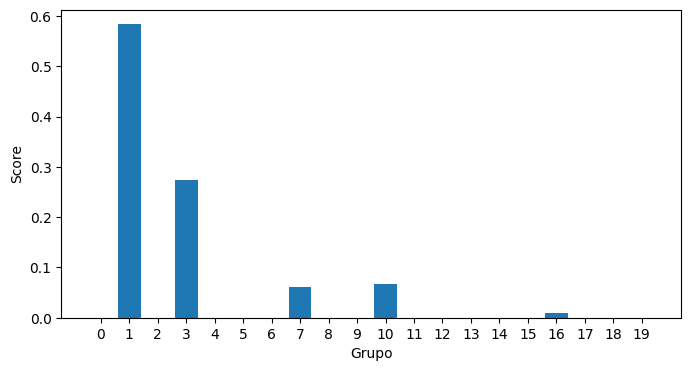

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(range(n_topics), text_query_lda[0]);
plt.xticks(range(n_topics));
plt.xlabel('Grupo')
plt.ylabel('Score');

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Show the characteristics of the three most relevant groups in the `text_query` text.

In [50]:
#
groups = text_query_lda[0].argsort()[:-4:-1]

characteristics = [topic_relevant_words(id, topic_term, terms,  10) for id in groups]
#

Grupo:  1
----------------------
romance:     	0.0526
series:     	0.0326
paranormal:     	0.0300
adult:     	0.0282
ya:     	0.0272
stars:     	0.0246
love:     	0.0167
contemporary:     	0.0146
to:     	0.0137
young:     	0.0114
----------------------

Grupo:  3
----------------------
fantasy:     	0.1234
fiction:     	0.0517
sci:     	0.0427
fi:     	0.0424
science:     	0.0272
scifi:     	0.0204
adult:     	0.0165
series:     	0.0159
adventure:     	0.0138
to:     	0.0121
----------------------

Grupo:  10
----------------------
short:     	0.0462
story:     	0.0294
literature:     	0.0262
classic:     	0.0262
fiction:     	0.0259
stories:     	0.0243
classics:     	0.0179
english:     	0.0170
school:     	0.0144
lit:     	0.0136
----------------------



<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Calculate the similarities (_Euclidean distance) of the document `text_query_lda` with the rest of the documents in the matrix `data_books_lda`, and store them in a vector named `similarities_lda`.

In [51]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance

similarities_lda_np = np.linalg.norm(data_books_lda - text_query_lda, axis=1)
#similarities_lda = euclidean_distances(text_query_lda.reshape(1, -1), data_books_lda)[0]

In [52]:
similarities_lda_np

array([0.43731473, 0.71039074, 0.10892689, ..., 0.958658  , 0.83309344,
       0.99371381])

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i></font> Get the indexes of the 10 books most similar to `text_query`. Keep in mind that `euclidean_distances` returns distances, not similarities, so you have to take the first indices.

In [53]:
top_similarities = np.argsort(similarities_lda_np)[1:11]

df_goodreads.iloc[top_similarities]['title']

6488                                 Shadows (Lux, #0.5)
4006                   Misguided Angel (Blue Bloods, #5)
623            All Together Dead (Sookie Stackhouse, #7)
2557          Blue Lily, Lily Blue (The Raven Cycle, #3)
5758      Midnight (The Vampire Diaries: The Return, #3)
9561    Kitty and the Silver Bullet (Kitty Norville, #4)
9952                    Marked in Flesh (The Others, #4)
3815          End of Days (Penryn & the End of Days, #3)
3606                                Opposition (Lux, #5)
1069                               Darkfever (Fever, #1)
Name: title, dtype: object

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

In this case the recommendations are not so obvious. However, it can be seen that the theme is very similar to that of _"Twilight"_.

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#00586D"></i></font></a>
</div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#00586D"></i> </font></div>